In [43]:
import os
import sys
sys.path.append("..")
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt


In [44]:
from scripts.util import *


In [45]:
def make_result(data, buffer=1):
    # Saving the results
    d = {
        'common-rewarded_stay':       0.,
        'common-non-rewarded_stay':   0.,
        'common-rewarded_switch':     0.,
        'common-non-rewarded_switch': 0.,
        'rare-rewarded_stay':         0.,
        'rare-non-rewarded_stay':     0.,
        'rare-rewarded_switch':       0.,
        'rare-non-rewarded_switch':   0.,
    }
    # Iterating through the data
    n_rows = len(data)
    for ii in range(buffer-1, len(data)):
        curr_row = data.iloc[ii]
        prev_row = data.iloc[ii-1]
        # If either choices were NaN skip
        if pd.isna(curr_row.choice1) or pd.isna(curr_row.choice2):
            continue
        # After a common transition
        if prev_row.common == 1:
        # Rewarded-stay
            if prev_row.reward == 1 and curr_row.choice1 == prev_row.choice1:
                d['common-rewarded_stay'] += 1.
            # Non-rewarded-stay
            elif prev_row.reward == 0 and curr_row.choice1 == prev_row.choice1:
                d['common-non-rewarded_stay'] += 1.
            # Rewarded-switch
            elif prev_row.reward == 1 and curr_row.choice1 != prev_row.choice1:
                d['common-rewarded_switch'] += 1.
            # Non-rewarded-switch
            elif prev_row.reward == 0 and curr_row.choice1 != prev_row.choice1:
                d['common-non-rewarded_switch'] += 1.
            else:
                raise ValueError("Unexpected case!")
        # After a rare transition
        else:
            # Rewarded-stay
            if prev_row.reward == 1 and curr_row.choice1 == prev_row.choice1:
                d['rare-rewarded_stay'] += 1.
            # Non-rewarded-stay
            elif prev_row.reward == 0 and curr_row.choice1 == prev_row.choice1:
                d['rare-non-rewarded_stay'] += 1.
            # Rewarded-switch
            elif prev_row.reward == 1 and curr_row.choice1 != prev_row.choice1:
                d['rare-rewarded_switch'] += 1.
            # Non-rewarded-switch
            elif prev_row.reward == 0 and curr_row.choice1 != prev_row.choice1:
                d['rare-non-rewarded_switch'] += 1.
            else:
                raise ValueError("Unexpected case!")
    # Returning the data
    return d

In [46]:
def convert_probability(d, buffer=1):
    prob_dict = {}
    prob_dict['common-rewarded']     = d['common-rewarded_stay'] / (d['common-rewarded_stay'] + d['common-rewarded_switch'])
    prob_dict['common-non-rewarded'] = d['common-non-rewarded_stay'] / (d['common-non-rewarded_stay'] + d['common-non-rewarded_switch'])
    prob_dict['rare-rewarded']       = d['rare-rewarded_stay'] / (d['rare-rewarded_stay'] + d['rare-rewarded_switch'])
    prob_dict['rare-non-rewarded']   = d['rare-non-rewarded_stay'] / (d['rare-non-rewarded_stay'] + d['rare-non-rewarded_switch'])
    return prob_dict

Saved figure 1B-combined_data.png to ../plots


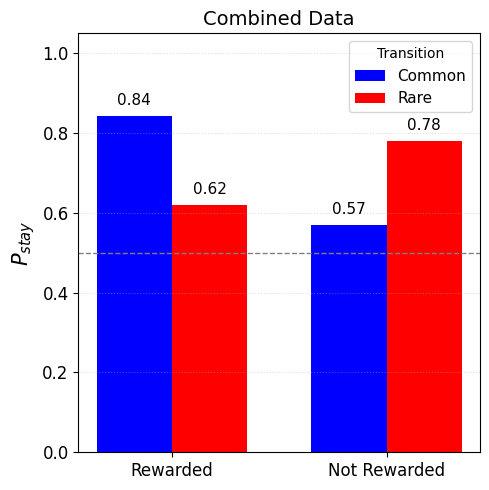

In [52]:
# First-pass results
data  = make_result(get_data(), buffer=1)
probs = convert_probability(data, buffer=1)

# Data structure
conditions = ['Rewarded', 'Not Rewarded']
transitions = ['Common', 'Rare']
values = [
    [probs['common-rewarded'], probs['rare-rewarded']],
    [probs['common-non-rewarded'], probs['rare-non-rewarded']]
]

x = np.arange(len(conditions))  # Now "Rewarded", "Not Rewarded" on x-axis
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))

# Bars for each transition type
bars1 = ax.bar(x - width/2, [v[0] for v in values], width, label='Common', color='blue')
bars2 = ax.bar(x + width/2, [v[1] for v in values], width, label='Rare', color='red')

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11)

# Formatting
ax.set_ylim(0, 1.05)
ax.set_ylabel(r'$P_{stay}$', fontsize=15)
ax.set_title('Combined Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(conditions, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Transition', fontsize=11)
ax.axhline(0.5, linestyle='--', color='gray', linewidth=1)
ax.grid(axis='y', linestyle=':', alpha=0.4)

plt.tight_layout()
save_plot(fig, '1B-combined_data.png')

Saved figure 1B-story_data.png to ../plots


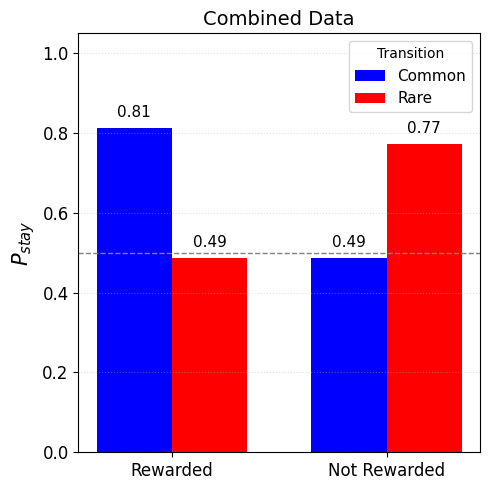

In [51]:
# First-pass results
data  = make_result(get_story_data(), buffer=1)
probs = convert_probability(data, buffer=1)

# Data structure
conditions = ['Rewarded', 'Not Rewarded']
transitions = ['Common', 'Rare']
values = [
    [probs['common-rewarded'], probs['rare-rewarded']],
    [probs['common-non-rewarded'], probs['rare-non-rewarded']]
]

x = np.arange(len(conditions))  # Now "Rewarded", "Not Rewarded" on x-axis
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))

# Bars for each transition type
bars1 = ax.bar(x - width/2, [v[0] for v in values], width, label='Common', color='blue')
bars2 = ax.bar(x + width/2, [v[1] for v in values], width, label='Rare', color='red')

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11)

# Formatting
ax.set_ylim(0, 1.05)
ax.set_ylabel(r'$P_{stay}$', fontsize=15)
ax.set_title('Combined Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(conditions, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Transition', fontsize=11)
ax.axhline(0.5, linestyle='--', color='gray', linewidth=1)
ax.grid(axis='y', linestyle=':', alpha=0.4)

plt.tight_layout()
save_plot(fig, '1B-story_data.png')

Saved figure 1B-abstract_data.png to ../plots


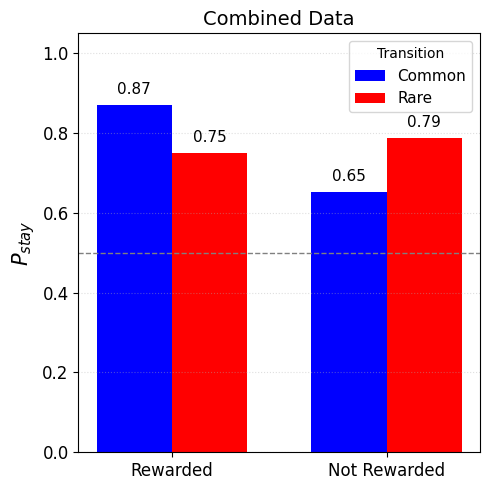

In [50]:
# First-pass results
data  = make_result(get_abstract_data(), buffer=1)
probs = convert_probability(data, buffer=1)

# Data structure
conditions = ['Rewarded', 'Not Rewarded']
transitions = ['Common', 'Rare']
values = [
    [probs['common-rewarded'], probs['rare-rewarded']],
    [probs['common-non-rewarded'], probs['rare-non-rewarded']]
]

x = np.arange(len(conditions))  # Now "Rewarded", "Not Rewarded" on x-axis
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))

# Bars for each transition type
bars1 = ax.bar(x - width/2, [v[0] for v in values], width, label='Common', color='blue')
bars2 = ax.bar(x + width/2, [v[1] for v in values], width, label='Rare', color='red')

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11)

# Formatting
ax.set_ylim(0, 1.05)
ax.set_ylabel(r'$P_{stay}$', fontsize=15)
ax.set_title('Combined Data', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(conditions, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Transition', fontsize=11)
ax.axhline(0.5, linestyle='--', color='gray', linewidth=1)
ax.grid(axis='y', linestyle=':', alpha=0.4)

plt.tight_layout()
save_plot(fig, '1B-abstract_data.png')